In [1]:
from fakahil_mtf_funcs import *
from skimage import io
import scipy as sp
import itertools

In [2]:
data_dir = r'D:\MSci_Project\1_Data'
bg_dir = data_dir + r'\2023-01-17 background images'
img_dir = data_dir + r'\2023-02-15 edge depth sweep green'

In [3]:
crop = [250, 550, 375, 575]

## f/a

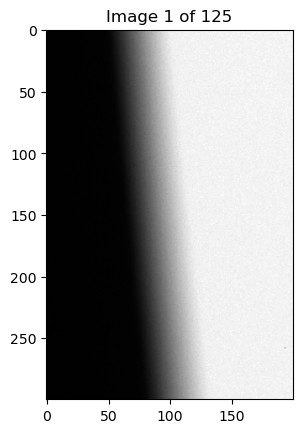

Loaded stack of 125 images, dimensions (300, 200)
Averaged original stack of 125 down to 25.
Loaded stack of 5 images, dimensions (300, 200)
Averaged original stack of 5 down to 1.
Loaded stack of 5 images, dimensions (300, 200)
Averaged original stack of 5 down to 1.
Removed background and divided illumination from 25 images.


In [4]:
img_path = img_dir + r'\2023-02-15 fa'
imgs =  load_stack(img_path, x_min=crop[0], x_max=crop[1], y_min=crop[2], y_max=crop[3], show=True)

avg_stack = average_stack(imgs)

bg_light_path = bg_dir + r'\2023-01-17 bg light f-a'
bg_dark_path = bg_dir + r'\2023-01-17 bg dark f-a'
bg_light = average_stack(load_stack(bg_light_path, x_min=crop[0], x_max=crop[1], y_min=crop[2], y_max=crop[3]))
bg_dark = average_stack(load_stack(bg_dark_path, x_min=crop[0], x_max=crop[1], y_min=crop[2], y_max=crop[3]))

divided = remove_background(avg_stack, bg_light, bg_dark)

In [5]:
depths = np.arange(9.45, 15.7, 0.25)

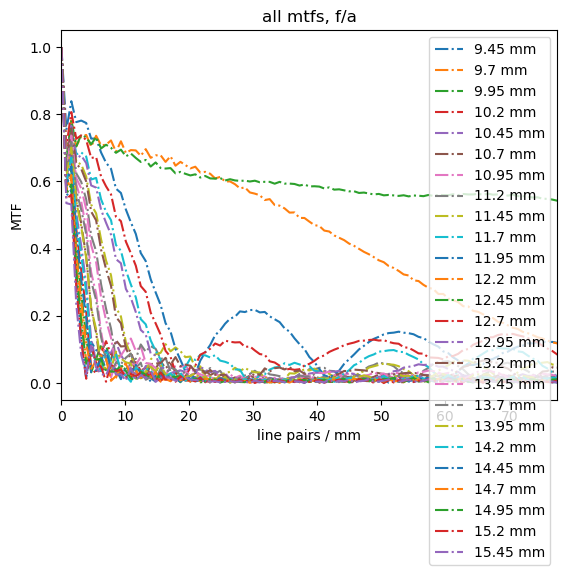

In [6]:
positions = []
frequencies = []
mtfs = []

for i in np.arange(0, len(divided), 1):
    freqs, mtf = allComputeMTF(divided[i], depths[i], plot=True)
    positions.append(depths[i])
    frequencies.append(freqs)
    mtfs.append(mtf)

plt.title('all mtfs, f/a')
plt.savefig('plots/all-mtfs-fa.png')
plt.show()

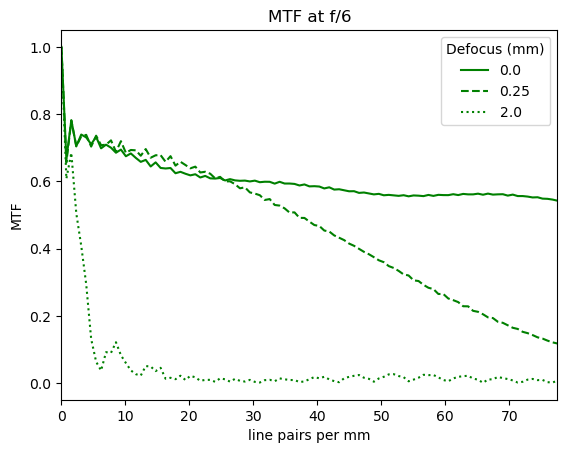

In [7]:
plt.plot(frequencies[12], mtfs[12], 'g-', label=f'{np.abs(positions[12]-12.45)}')
plt.plot(frequencies[11], mtfs[11], 'g--', label=f'{np.abs(positions[11]-12.45)}')
plt.plot(frequencies[4], mtfs[4], 'g:', label=f'{np.abs(positions[4]-12.45)}')

plt.xlim(0,0.5/6.45e-3)
plt.legend(title="Defocus (mm)")
plt.xlabel('line pairs per mm')
plt.ylabel('MTF')
plt.title('MTF at f/6')
plt.savefig('plots/all-mtfs-fa-tidy.png')
plt.show()

In [8]:
all_mtfs = list(itertools.chain.from_iterable(mtfs))

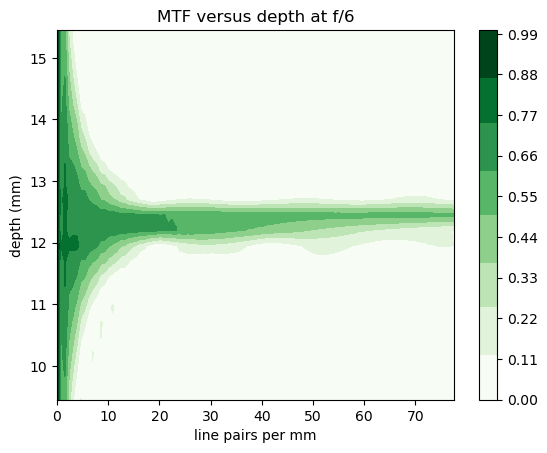

In [9]:
MTF = np.array(all_mtfs).reshape(len(depths), crop[3]-crop[2])
plt.contourf(frequencies[0], positions, MTF, 100, cmap=plt.cm.get_cmap('Greens', 8))
plt.xlim(0, 0.5/6.45e-3)
plt.xlabel('line pairs per mm')
plt.ylabel('depth (mm)')
plt.title('MTF versus depth at f/6')
plt.colorbar()
plt.savefig('plots/contour-fa.png')
plt.show()

## f/c

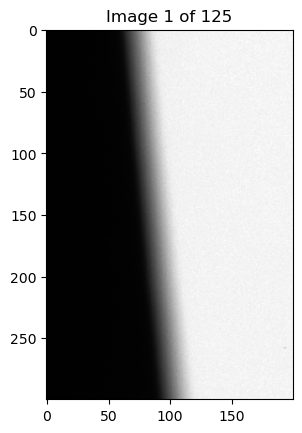

Loaded stack of 125 images, dimensions (300, 200)
Averaged original stack of 125 down to 25.
Loaded stack of 5 images, dimensions (300, 200)
Averaged original stack of 5 down to 1.
Loaded stack of 5 images, dimensions (300, 200)
Averaged original stack of 5 down to 1.
Removed background and divided illumination from 25 images.


In [10]:
img_path = img_dir + r'\2023-02-15 fc'
imgs =  load_stack(img_path, x_min=crop[0], x_max=crop[1], y_min=crop[2], y_max=crop[3], show=True)

avg_stack = average_stack(imgs)

bg_light_path = bg_dir + r'\2023-01-17 bg light f-c'
bg_dark_path = bg_dir + r'\2023-01-17 bg dark f-c'
bg_light = average_stack(load_stack(bg_light_path, x_min=crop[0], x_max=crop[1], y_min=crop[2], y_max=crop[3]))
bg_dark = average_stack(load_stack(bg_dark_path, x_min=crop[0], x_max=crop[1], y_min=crop[2], y_max=crop[3]))

divided = remove_background(avg_stack, bg_light, bg_dark)

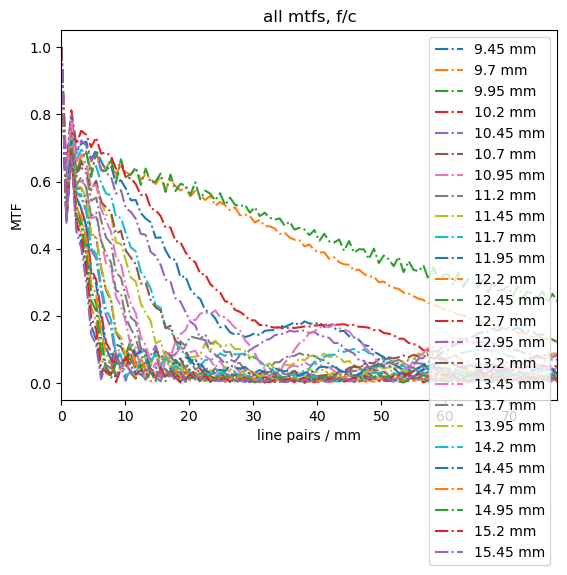

In [11]:
positions = []
frequencies = []
mtfs = []

for i in np.arange(0, len(divided), 1):
    freqs, mtf = allComputeMTF(divided[i], depths[i], plot=True)
    positions.append(depths[i])
    frequencies.append(freqs)
    mtfs.append(mtf)
    # plt.show()

plt.title('all mtfs, f/c')
plt.savefig('plots/all-mtfs-fc.png')
plt.show()

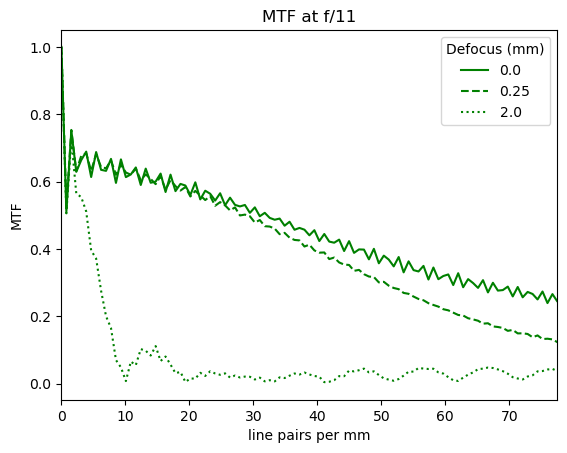

In [12]:
plt.plot(frequencies[12], mtfs[12], 'g-', label=f'{np.abs(positions[12]-12.45)}')
plt.plot(frequencies[11], mtfs[11], 'g--', label=f'{np.abs(positions[11]-12.45)}')
plt.plot(frequencies[4], mtfs[4], 'g:', label=f'{np.abs(positions[4]-12.45)}')

plt.xlim(0,0.5/6.45e-3)
plt.legend(title="Defocus (mm)")
plt.xlabel('line pairs per mm')
plt.ylabel('MTF')
plt.title('MTF at f/11')
plt.savefig('plots/all-mtfs-fc-tidy.png')
plt.show()

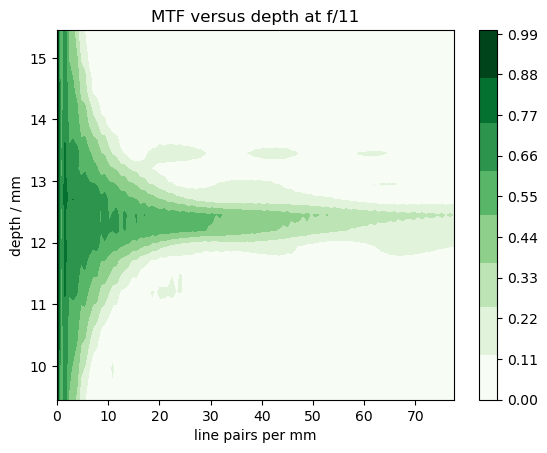

In [13]:
all_mtfs = list(itertools.chain.from_iterable(mtfs))
MTF = np.array(all_mtfs).reshape(len(depths), crop[3]-crop[2])
plt.contourf(frequencies[0], positions, MTF, 100, cmap=plt.cm.get_cmap('Greens', 8))
plt.xlim(0,0.5/6.45e-3)
plt.xlabel('line pairs per mm')
plt.ylabel('depth / mm')
plt.title('MTF versus depth at f/11')
plt.colorbar()
plt.savefig('plots/contour-fc.png')
plt.show()

## f/d

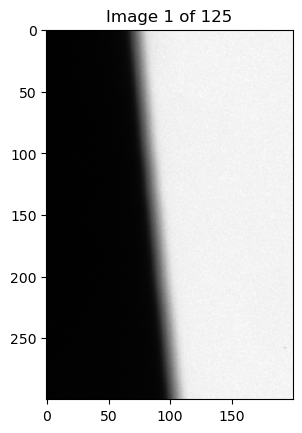

Loaded stack of 125 images, dimensions (300, 200)
Averaged original stack of 125 down to 25.
Loaded stack of 5 images, dimensions (300, 200)
Averaged original stack of 5 down to 1.
Loaded stack of 5 images, dimensions (300, 200)
Averaged original stack of 5 down to 1.
Removed background and divided illumination from 25 images.


In [14]:
img_path = img_dir + r'\2023-02-15 fd'
imgs =  load_stack(img_path, x_min=crop[0], x_max=crop[1], y_min=crop[2], y_max=crop[3], show=True)

avg_stack = average_stack(imgs)

bg_light_path = bg_dir + r'\2023-01-17 bg light f-d'
bg_dark_path = bg_dir + r'\2023-01-17 bg dark f-d'
bg_light = average_stack(load_stack(bg_light_path, x_min=crop[0], x_max=crop[1], y_min=crop[2], y_max=crop[3]))
bg_dark = average_stack(load_stack(bg_dark_path, x_min=crop[0], x_max=crop[1], y_min=crop[2], y_max=crop[3]))

divided = remove_background(avg_stack, bg_light, bg_dark)

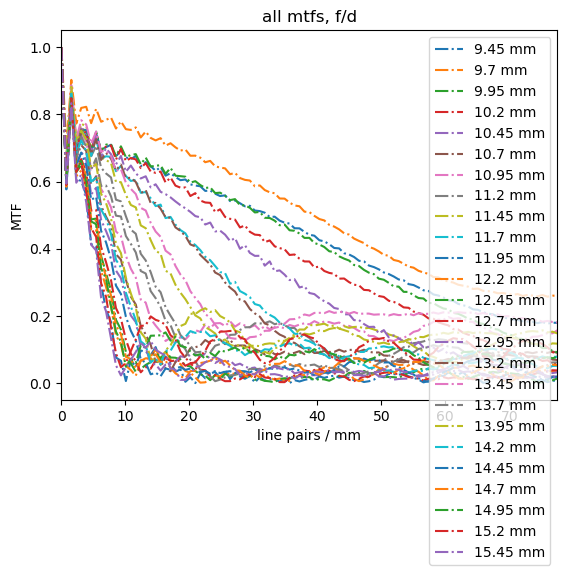

In [15]:
positions = []
frequencies = []
mtfs = []

for i in np.arange(0, len(divided), 1):
    freqs, mtf = allComputeMTF(divided[i], depths[i], plot=True)
    positions.append(depths[i])
    frequencies.append(freqs)
    mtfs.append(mtf)
    # plt.show()

plt.title('all mtfs, f/d')
plt.savefig('plots/all-mtfs-fd.png')
plt.show()

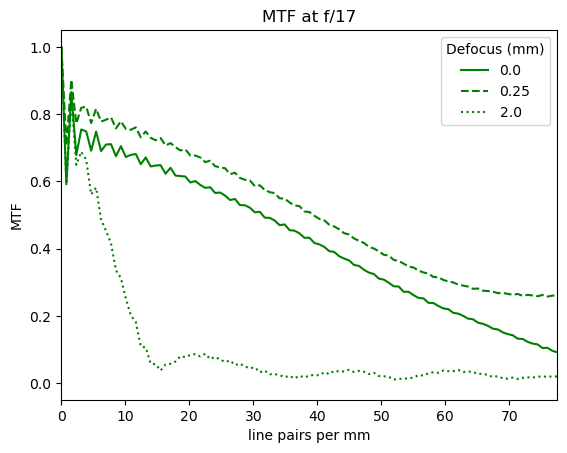

In [16]:
plt.plot(frequencies[12], mtfs[12], 'g-', label=f'{np.abs(positions[12]-12.45)}')
plt.plot(frequencies[11], mtfs[11], 'g--', label=f'{np.abs(positions[11]-12.45)}')
plt.plot(frequencies[4], mtfs[4], 'g:', label=f'{np.abs(positions[4]-12.45)}')

plt.xlim(0,0.5/6.45e-3)
plt.legend(title="Defocus (mm)")
plt.xlabel('line pairs per mm')
plt.ylabel('MTF')
plt.title('MTF at f/17')
plt.savefig('plots/all-mtfs-fd-tidy.png')
plt.show()

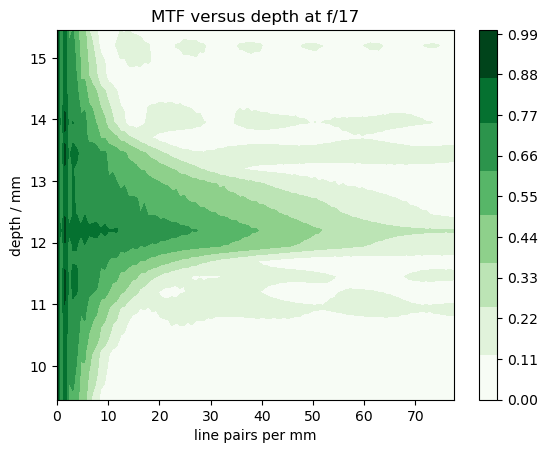

In [17]:
all_mtfs = list(itertools.chain.from_iterable(mtfs))
MTF = np.array(all_mtfs).reshape(len(depths), crop[3]-crop[2])
plt.contourf(frequencies[0], positions, MTF, 100, cmap=plt.cm.get_cmap('Greens', 8))
plt.xlim(0,0.5/6.45e-3)
plt.xlabel('line pairs per mm')
plt.ylabel('depth / mm')
plt.title('MTF versus depth at f/17')
plt.colorbar()
plt.savefig('plots/contour-fd.png')
plt.show()

## f/e

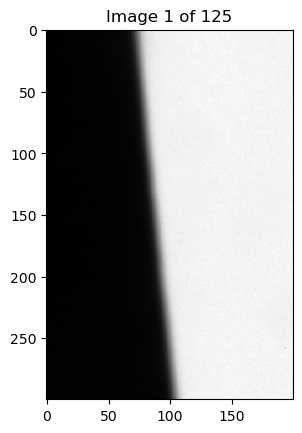

Loaded stack of 125 images, dimensions (300, 200)
Averaged original stack of 125 down to 25.
Loaded stack of 5 images, dimensions (300, 200)
Averaged original stack of 5 down to 1.
Loaded stack of 5 images, dimensions (300, 200)
Averaged original stack of 5 down to 1.
Removed background and divided illumination from 25 images.


In [18]:
img_path = img_dir + r'\2023-02-15 fe'
imgs =  load_stack(img_path, x_min=crop[0], x_max=crop[1], y_min=crop[2], y_max=crop[3], show=True)

avg_stack = average_stack(imgs)

bg_light_path = bg_dir + r'\2023-01-17 bg light f-e'
bg_dark_path = bg_dir + r'\2023-01-17 bg dark f-e'
bg_light = average_stack(load_stack(bg_light_path, x_min=crop[0], x_max=crop[1], y_min=crop[2], y_max=crop[3]))
bg_dark = average_stack(load_stack(bg_dark_path, x_min=crop[0], x_max=crop[1], y_min=crop[2], y_max=crop[3]))

divided = remove_background(avg_stack, bg_light, bg_dark)

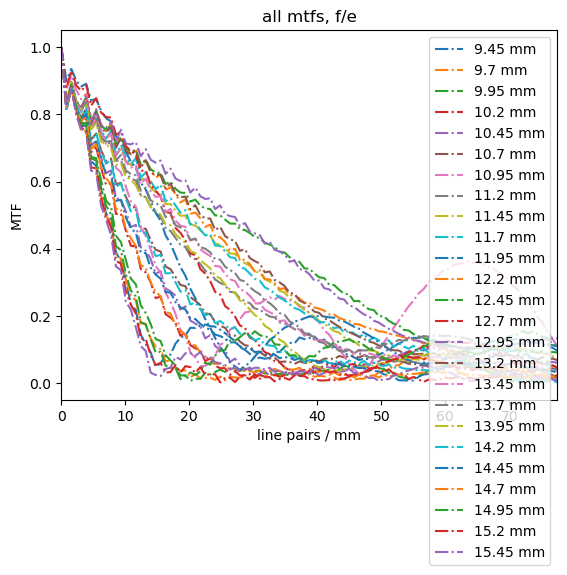

In [19]:
positions = []
frequencies = []
mtfs = []

for i in np.arange(0, len(divided), 1):
    freqs, mtf = allComputeMTF(divided[i], depths[i], plot=True)
    positions.append(depths[i])
    frequencies.append(freqs)
    mtfs.append(mtf)
    # plt.show()

plt.title('all mtfs, f/e')
plt.savefig('plots/all-mtfs-fe.png')
plt.show()

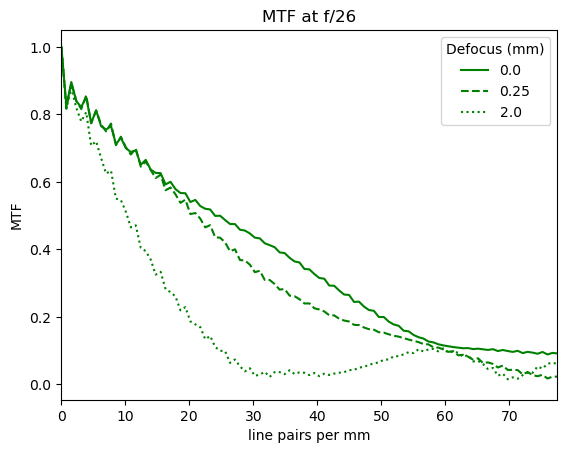

In [20]:
plt.plot(frequencies[12], mtfs[12], 'g-', label=f'{np.abs(positions[12]-12.45)}')
plt.plot(frequencies[11], mtfs[11], 'g--', label=f'{np.abs(positions[11]-12.45)}')
plt.plot(frequencies[4], mtfs[4], 'g:', label=f'{np.abs(positions[4]-12.45)}')

plt.xlim(0,0.5/6.45e-3)
plt.legend(title="Defocus (mm)")
plt.xlabel('line pairs per mm')
plt.ylabel('MTF')
plt.title('MTF at f/26')
plt.savefig('plots/all-mtfs-fe-tidy.png')
plt.show()

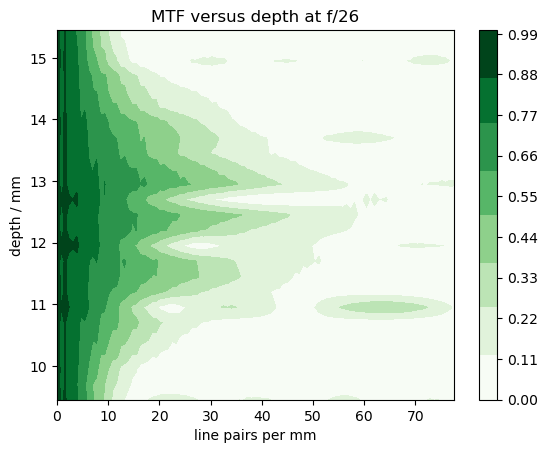

In [21]:
all_mtfs = list(itertools.chain.from_iterable(mtfs))
MTF = np.array(all_mtfs).reshape(len(depths), crop[3]-crop[2])
plt.contourf(frequencies[0], positions, MTF, 100, cmap=plt.cm.get_cmap('Greens', 8))
plt.xlim(0,0.5/6.45e-3)
plt.xlabel('line pairs per mm')
plt.ylabel('depth / mm')
plt.title('MTF versus depth at f/26')
plt.colorbar()
plt.savefig('plots/contour-fe.png')
plt.show()

## f/f

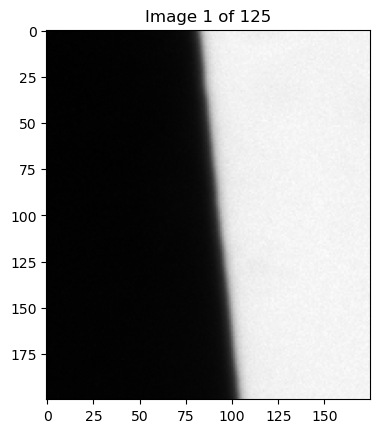

Loaded stack of 125 images, dimensions (200, 175)
Averaged original stack of 125 down to 25.


In [22]:
img_path = img_dir + r'\2023-02-15 ff'
crop_f = [350, 550, 375, 550]
imgs =  load_stack(img_path, x_min=crop_f[0], x_max=crop_f[1], y_min=crop_f[2], y_max=crop_f[3], show=True)

avg_stack = average_stack(imgs)

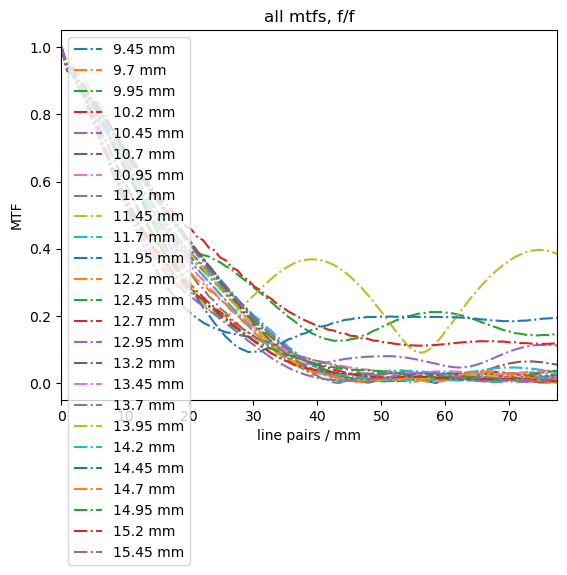

In [23]:
positions = []
frequencies = []
mtfs = []

for i in np.arange(0, len(avg_stack), 1):
    freqs, mtf = allComputeMTF(avg_stack[i], depths[i], plot=True)
    positions.append(depths[i])
    frequencies.append(freqs)
    mtfs.append(mtf)
    # plt.show()

plt.title('all mtfs, f/f')
plt.savefig('plots/all-mtfs-ff.png')
plt.show()

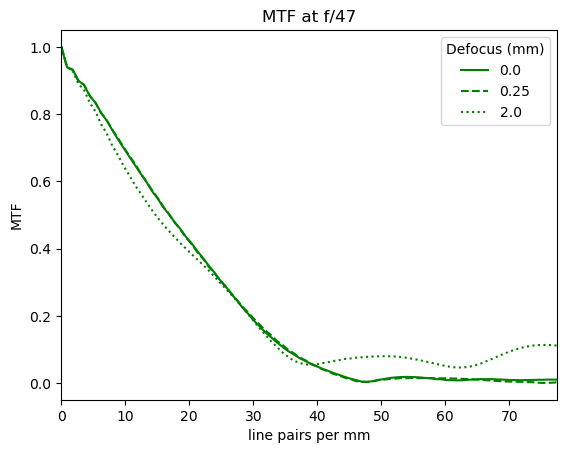

In [24]:
plt.plot(frequencies[12], mtfs[12], 'g-', label=f'{np.abs(positions[12]-12.45)}')
plt.plot(frequencies[11], mtfs[11], 'g--', label=f'{np.abs(positions[11]-12.45)}')
plt.plot(frequencies[4], mtfs[4], 'g:', label=f'{np.abs(positions[4]-12.45)}')

plt.xlim(0,0.5/6.45e-3)
plt.legend(title="Defocus (mm)")
plt.xlabel('line pairs per mm')
plt.ylabel('MTF')
plt.title('MTF at f/47')
plt.savefig('plots/all-mtfs-ff-tidy.png')
plt.show()

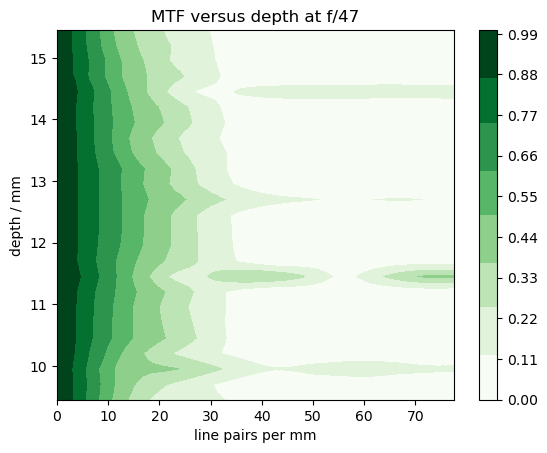

In [25]:
all_mtfs = list(itertools.chain.from_iterable(mtfs))
MTF = np.array(all_mtfs).reshape(len(depths), crop_f[3]-crop_f[2])
plt.contourf(frequencies[0], positions, MTF, 100, cmap=plt.cm.get_cmap('Greens', 8))
plt.xlim(0,0.5/6.45e-3)
plt.xlabel('line pairs per mm')
plt.ylabel('depth / mm')
plt.title('MTF versus depth at f/47')
plt.colorbar()
plt.savefig('plots/contour-ff.png')
plt.show()